# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [51]:
data4 = datasets.load_iris()
data4
X = data4['data']
y = data4['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
classifier = LogisticRegression() 
classifier.fit(X_train, y_train)


LogisticRegression()

In [52]:
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred) 
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred)) 
accuracyLogisticIris = metrics.accuracy_score(y_test, y_pred)
precisionLogisticIris =metrics.precision_score(y_test, y_pred,average='weighted')
recallLogisticIris = metrics.recall_score(y_test, y_pred,average='weighted')
f1LogisticIris = metrics.f1_score(y_test, y_pred,average='weighted')
logisticIrisMetrics = [accuracyLogisticIris,precisionLogisticIris,recallLogisticIris,f1LogisticIris]


Accuracy :  1.0


#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [65]:
mnist = datasets.load_digits()
X = mnist["data"]
y = mnist["target"]
logistic = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=2)
logistic.fit(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred = logistic.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred) 
accuracyLogistic = metrics.accuracy_score(y_test, y_pred)
precisionLogistic =metrics.precision_score(y_test, y_pred,average='weighted')
recallLogistic = metrics.recall_score(y_test, y_pred,average='weighted')
f1Logistic = metrics.f1_score(y_test, y_pred,average='weighted')
logisticMetrics = [accuracyLogistic,precisionLogistic,recallLogistic,f1Logistic]

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [62]:
data4 = datasets.load_iris()
data4
X = data4['data']
y = data4['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=2)

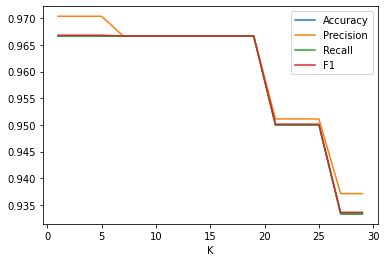

In [63]:
k_range = np.arange(1,30,2)
print()
acc = []
precision = []  
recall = []
f1 = []  
def createModel(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))
  recall.append(metrics.recall_score(y_test, y_pred,average='weighted'))
  f1.append(metrics.f1_score(y_test, y_pred,average='weighted'))

for i in k_range:
  createModel(i)

kBest = -99
accuracy_max = 0
for i in range(k_range.size):
  if(acc[i] > accuracy_max):
    accuracy_max = acc[i]
    kBest = k_range[i]

plt.plot(k_range, acc, label = 'Accuracy')
plt.plot(k_range, precision, label = 'Precision')
plt.plot(k_range, recall, label = 'Recall')
plt.plot(k_range, f1, label = 'F1')

plt.xlabel("K")
plt.legend()

accuracy_best_kNN = acc[kBest]
precision_score_best_kNN = precision[kBest]
recall_best_kNN = recall[kBest]
f1_best_kNN = f1[kBest]
kNNMetrics = np.array([accuracy_best_kNN, precision_score_best_kNN, recall_best_kNN, f1_best_kNN])


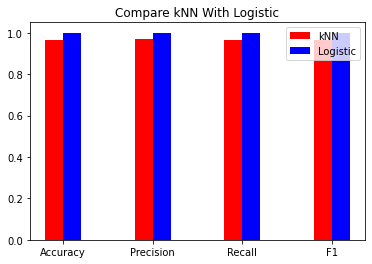

In [67]:

labelX = ("Accuracy", "Precision", "Recall", "F1")
X_axis = np.arange(len(labelX))

plt.bar(X_axis  -0.1, kNNMetrics, color="red",width = 0.2, label = "kNN")
plt.bar(X_axis + 0.1, logisticIrisMetrics, color="blue",width = 0.2, label = "Logistic")
plt.xticks(X_axis,labelX)
plt.title("Compare kNN With Logistic")
plt.legend()

plt.show()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [68]:
mnist = datasets.load_digits()
X = mnist["data"]
y = mnist["target"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=2)


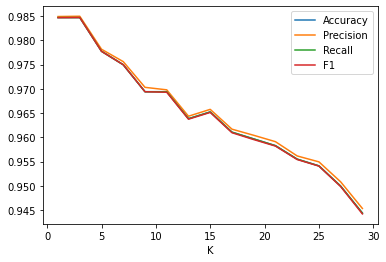

In [69]:
k_range = np.arange(1,30,2)
print()
acc = []
precision = []  
recall = []
f1 = []  
def createModel(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred, average='weighted'))
  recall.append(metrics.recall_score(y_test, y_pred,average='weighted'))
  f1.append(metrics.f1_score(y_test, y_pred,average='weighted'))

for i in k_range:
  createModel(i)

kBest = -99
accuracy_max = 0
for i in range(k_range.size):
  if(acc[i] > accuracy_max):
    accuracy_max = acc[i]
    kBest = k_range[i]

plt.plot(k_range, acc, label = 'Accuracy')
plt.plot(k_range, precision, label = 'Precision')
plt.plot(k_range, recall, label = 'Recall')
plt.plot(k_range, f1, label = 'F1')

plt.xlabel("K")
plt.legend()

accuracy_best_kNN = acc[kBest]
precision_score_best_kNN = precision[kBest]
recall_best_kNN = recall[kBest]
f1_best_kNN = f1[kBest]
kNNMetrics = np.array([accuracy_best_kNN, precision_score_best_kNN, recall_best_kNN, f1_best_kNN])

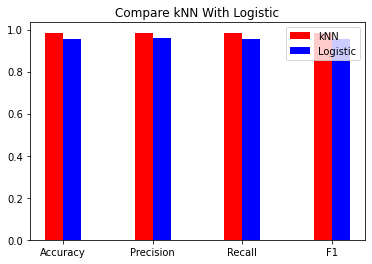

In [70]:
labelX = ("Accuracy", "Precision", "Recall", "F1")
X_axis = np.arange(len(labelX))

plt.bar(X_axis  -0.1, kNNMetrics, color="red",width = 0.2, label = "kNN")
plt.bar(X_axis + 0.1, logisticMetrics, color="blue",width = 0.2, label = "Logistic")
plt.xticks(X_axis,labelX)
plt.title("Compare kNN With Logistic")
plt.legend()

plt.show()

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
pd.rea

#Finally,
Save a copy in your Github. Remember renaming the notebook.